# Data Extraction

In [1]:
import db_utils
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
#Save the CVS file from RDS Database
creds = db_utils.load_creds()
rds = db_utils.RDSDatabaseConnector(creds)
engine = rds.initialise_engine()
df_temp = rds.extract_data_to_dataframe('loan_payments')
rds.save_dataframe_to_csv(df_temp, 'loan_payments.csv')

# Exploratory Data Analysis (EDA)

In [3]:
#Load the CVS file
df = db_utils.load_data_to_dataframe("loan_payments.csv")

#### Conversions to be made

- loan_amount to float

- term to numeric

- term, mths_since_last_delinq, mths_since_last_record, collections_12_mths_ex_med, mths_since_last_major_derog to int (currently contain NaNs so cannot)

- grade, sub_grade, home_ownership, verification_status, loan_status, policy_code, application_type, employment_length to categorical

- issue_date, earliest_credit_line, last_payment_date, next_payment_date, last_credit_pull_date to datetime

- payment_plan to bool

In [4]:
#Transform data types
df_dt = db_utils.DataTransform(df)

df_dt.convert_to_float("loan_amount")
df_dt.convert_term_to_numeric("term")

cat_col = ["grade", "sub_grade", "home_ownership", "verification_status", "loan_status", "policy_code", "application_type", "employment_length"]
for col in cat_col:
    df_dt.convert_to_category(col)

date_col = ["issue_date", "earliest_credit_line", "last_payment_date", "next_payment_date", "last_credit_pull_date"]
for col in date_col:
    df_dt.convert_to_datetime(col)

df_dt.convert_to_bool("payment_plan")

In [5]:
#Info extraction
df_info = db_utils.DataFrameInfo(df)
df_info.d_types()
df_info.described()
df_info.shape()
df_info.count_distinct_vals()
df_info.count_null_vals()
df

DataFrame dtypes: 
 id                                      int64
member_id                               int64
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                   object
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                             bool
purpose                                object
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,8000.0,36,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,True,credit_card,19.54,2,1987-10-01,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,13200.0,36,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,True,credit_card,24.20,0,2001-09-01,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,16000.0,36,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,True,credit_card,16.92,0,1998-09-01,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,15000.0,36,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,True,debt_consolidation,35.52,0,2008-06-01,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,15000.0,36,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,True,debt_consolidation,3.33,0,2002-04-01,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000.0,5000.0,1775.0,36,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,2013-07-01,Fully Paid,True,other,10.00,2,2003-04-01,0,5.0,NaN,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000.0,5000.0,2350.0,36,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,2013-10-01,Fully Paid,True,other,24.40,0,1999-01-01,3,0.0,0.0,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500.0,3500.0,2225.0,36,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,True,debt_consolidation,1.00,0,1984-02-01,0,NaN,NaN,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000.0,5000.0,225.0,36,7.43,155.38,A,A2,4 years,RENT,200000.0,Not Verified,2013-08-01,Fully Paid,True,house,0.28,0,1995-03-01,0,0.0,0.0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,NaN,NaN,1,INDIVIDUAL


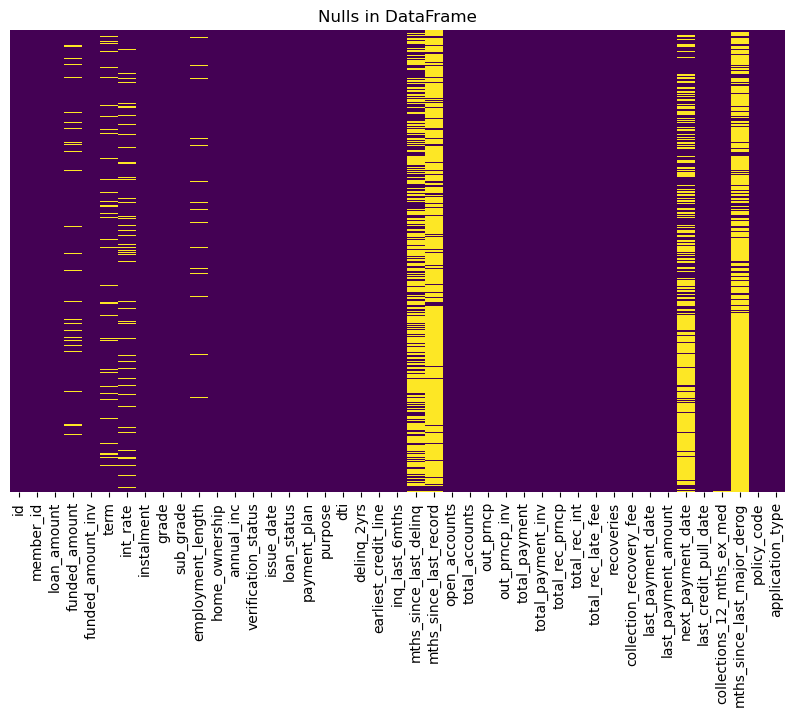

In [6]:
#Plot before null imputation
df_plot = db_utils.Plotter(df)
df_plot.visualise_missing_vals()

In [7]:
#Drop Columns
df_dft = db_utils.DataFrameTransform(df)
df_dft.drop_null_cols()
df_info.count_null_vals()

DataFrame nulls: 
 id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp          

(id                               0
 member_id                        0
 loan_amount                      0
 funded_amount                 3007
 funded_amount_inv                0
 term                          4772
 int_rate                      5169
 instalment                       0
 grade                            0
 sub_grade                        0
 employment_length             2118
 home_ownership                   0
 annual_inc                       0
 verification_status              0
 issue_date                       0
 loan_status                      0
 payment_plan                     0
 purpose                          0
 dti                              0
 delinq_2yrs                      0
 earliest_credit_line             0
 inq_last_6mths                   0
 open_accounts                    0
 total_accounts                   0
 out_prncp                        0
 out_prncp_inv                    0
 total_payment                    0
 total_payment_inv          

In [8]:
#Imputation
df_dft.impute_null_cols('funded_amount', 'mean')
df_dft.impute_null_cols('term', 'median')
df_dft.impute_null_cols('int_rate', 'mean')
df_dft.impute_null_cols('employment_length', 'mode')
df_dft.impute_null_cols('last_payment_date', 'median')
df_dft.impute_null_cols('last_credit_pull_date', 'median')
df_dft.impute_null_cols('collections_12_mths_ex_med', 'median')
df_info.count_null_vals()

DataFrame nulls: 
 id                            0
member_id                     0
loan_amount                   0
funded_amount                 0
funded_amount_inv             0
term                          0
int_rate                      0
instalment                    0
grade                         0
sub_grade                     0
employment_length             0
home_ownership                0
annual_inc                    0
verification_status           0
issue_date                    0
loan_status                   0
payment_plan                  0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_credit_line          0
inq_last_6mths                0
open_accounts                 0
total_accounts                0
out_prncp                     0
out_prncp_inv                 0
total_payment                 0
total_payment_inv             0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee   

(id                            0
 member_id                     0
 loan_amount                   0
 funded_amount                 0
 funded_amount_inv             0
 term                          0
 int_rate                      0
 instalment                    0
 grade                         0
 sub_grade                     0
 employment_length             0
 home_ownership                0
 annual_inc                    0
 verification_status           0
 issue_date                    0
 loan_status                   0
 payment_plan                  0
 purpose                       0
 dti                           0
 delinq_2yrs                   0
 earliest_credit_line          0
 inq_last_6mths                0
 open_accounts                 0
 total_accounts                0
 out_prncp                     0
 out_prncp_inv                 0
 total_payment                 0
 total_payment_inv             0
 total_rec_prncp               0
 total_rec_int                 0
 total_rec

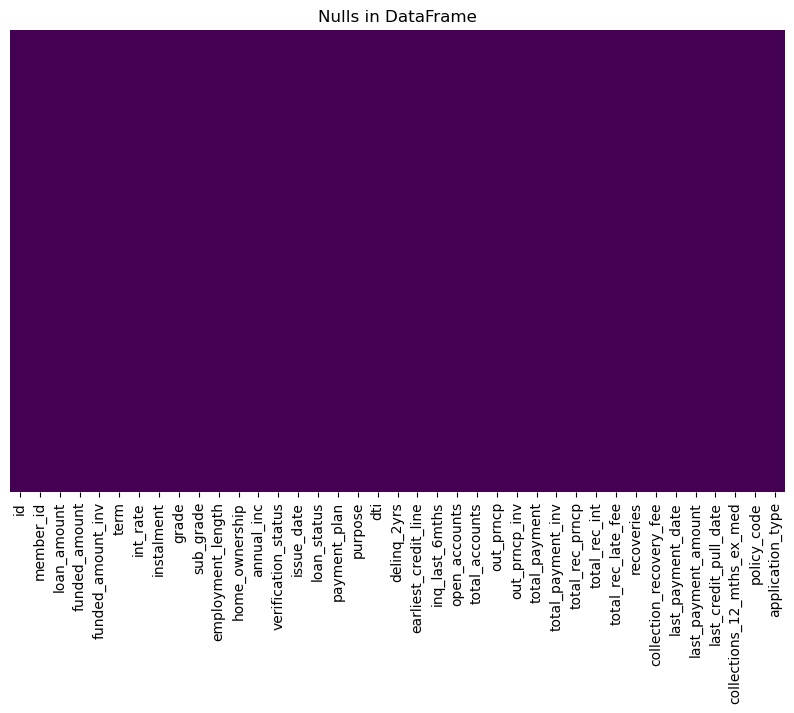

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,8000.0,36,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,True,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,13200.0,36,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,True,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,16000.0,36,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,True,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,15000.0,36,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,True,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,15000.0,36,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,True,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL


In [9]:
#Plot after null imputation
df_plot.visualise_missing_vals()
df.head()

In [10]:
#Finishing float to int conversions
int_col = ["term", "collections_12_mths_ex_med"]
for col in int_col:
    df_dt.convert_to_int(col)

df_info.d_types()

DataFrame dtypes: 
 id                                     int64
member_id                              int64
loan_amount                          float64
funded_amount                        float64
funded_amount_inv                    float64
term                                   int32
int_rate                             float64
instalment                           float64
grade                               category
sub_grade                           category
employment_length                   category
home_ownership                      category
annual_inc                           float64
verification_status                 category
issue_date                    datetime64[ns]
loan_status                         category
payment_plan                            bool
purpose                               object
dti                                  float64
delinq_2yrs                            int64
earliest_credit_line          datetime64[ns]
inq_last_6mths                     

Index(['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
       'annual_inc', 'open_accounts', 'total_accounts', 'total_payment',
       'total_payment_inv', 'total_rec_prncp', 'total_rec_int',
       'last_payment_amount'],
      dtype='object') 
 loan_amount            0.805259
funded_amount          0.845563
funded_amount_inv      0.813927
int_rate               0.433193
instalment             0.996981
annual_inc             8.711831
dti                    0.189420
open_accounts          1.059282
total_accounts         0.779014
total_payment          1.267891
total_payment_inv      1.256197
total_rec_prncp        1.261015
total_rec_int          2.204322
last_payment_amount    2.499381
dtype: float64


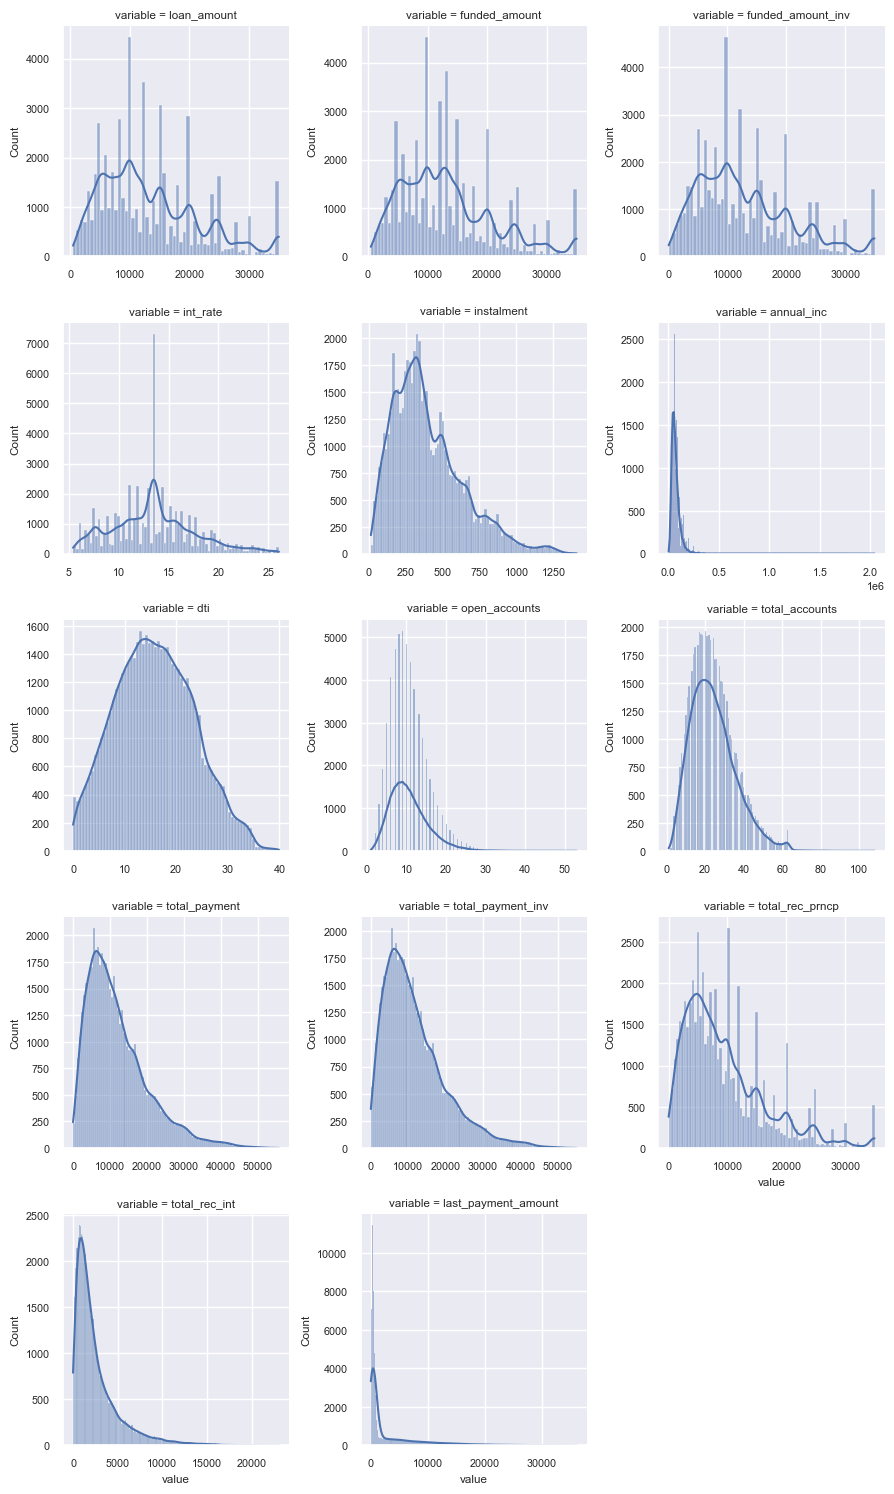

In [11]:
#Checking skew
excluded_cols = ['id', 'member_id', 'term', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med'] #cols that are basically categorical & id cols
df_dft.identify_skewed_cols(excluded_cols)
df_plot.visualise_skew(excluded_cols)

Index(['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
       'annual_inc', 'open_accounts', 'total_accounts', 'total_payment',
       'total_payment_inv', 'total_rec_prncp', 'total_rec_int',
       'last_payment_amount'],
      dtype='object') 
 loan_amount            0.805259
funded_amount          0.845563
funded_amount_inv      0.813927
int_rate               0.433193
instalment             0.996981
annual_inc             8.711831
dti                    0.189420
open_accounts          1.059282
total_accounts         0.779014
total_payment          1.267891
total_payment_inv      1.256197
total_rec_prncp        1.261015
total_rec_int          2.204322
last_payment_amount    2.499381
dtype: float64


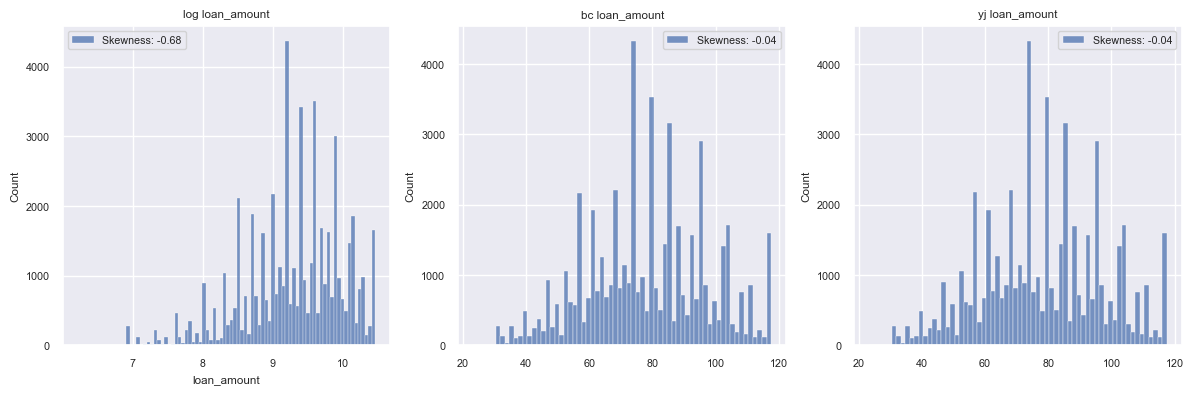

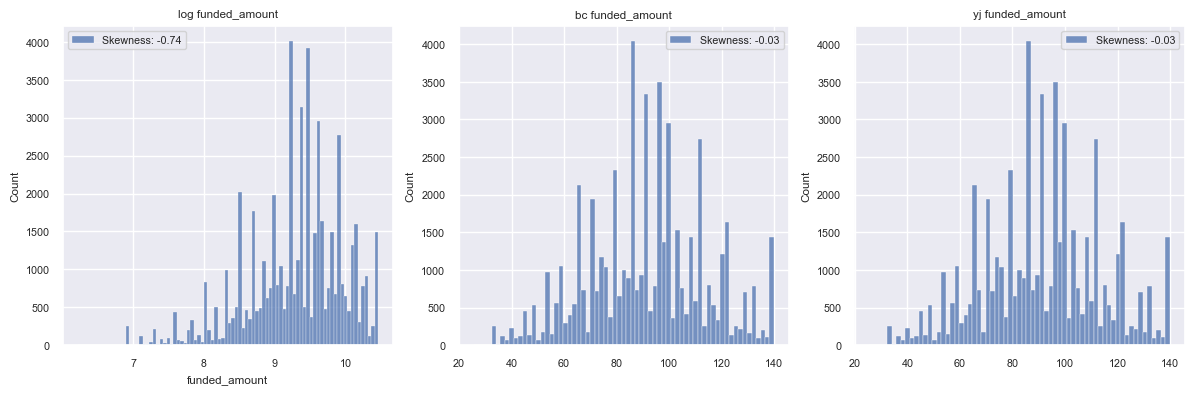

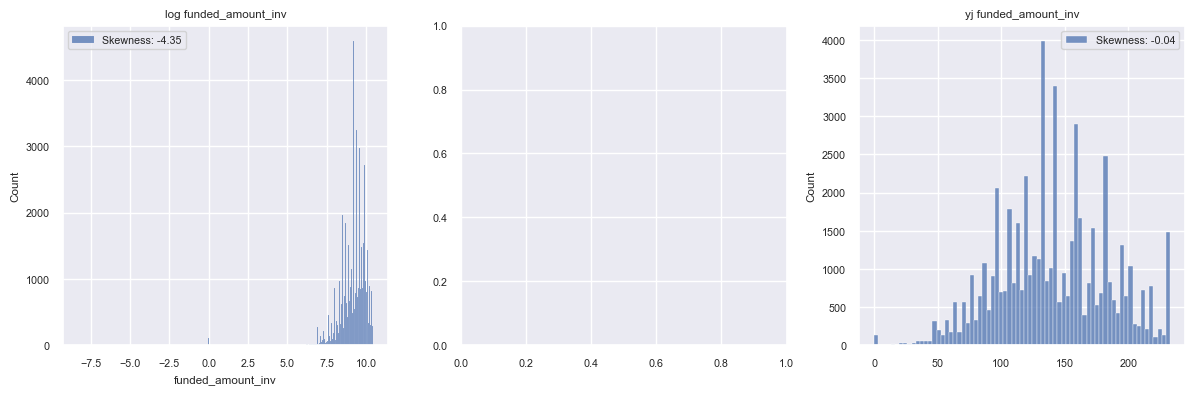

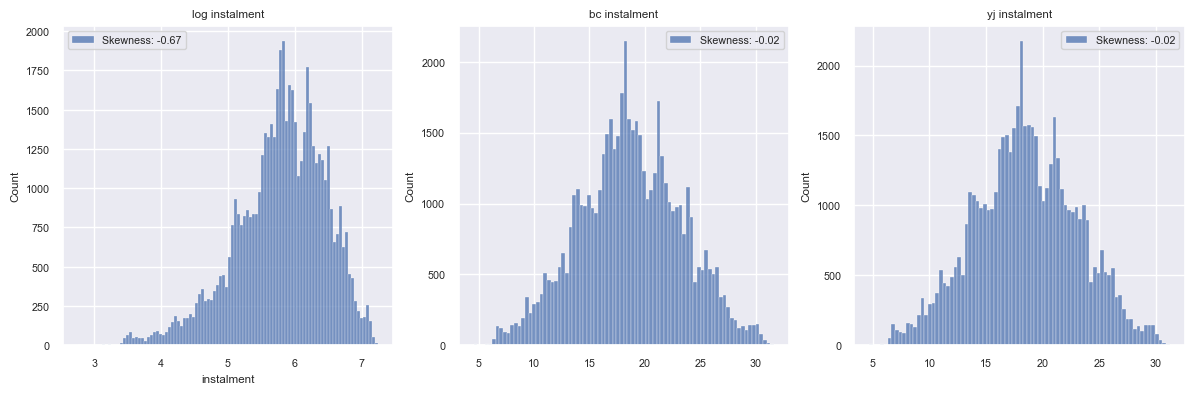

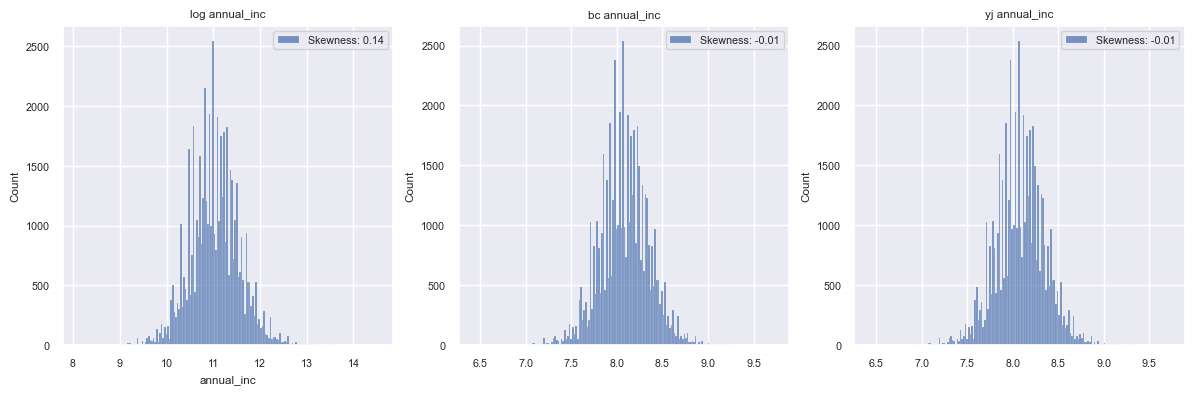

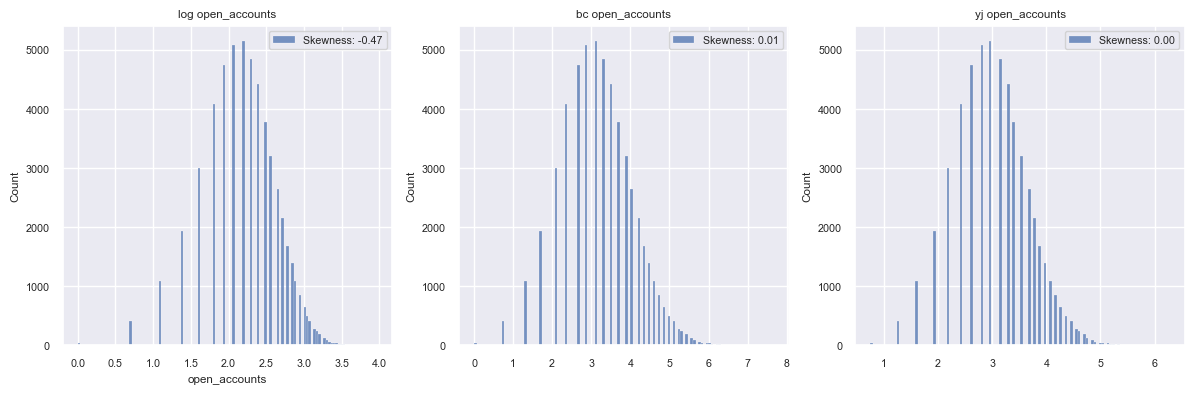

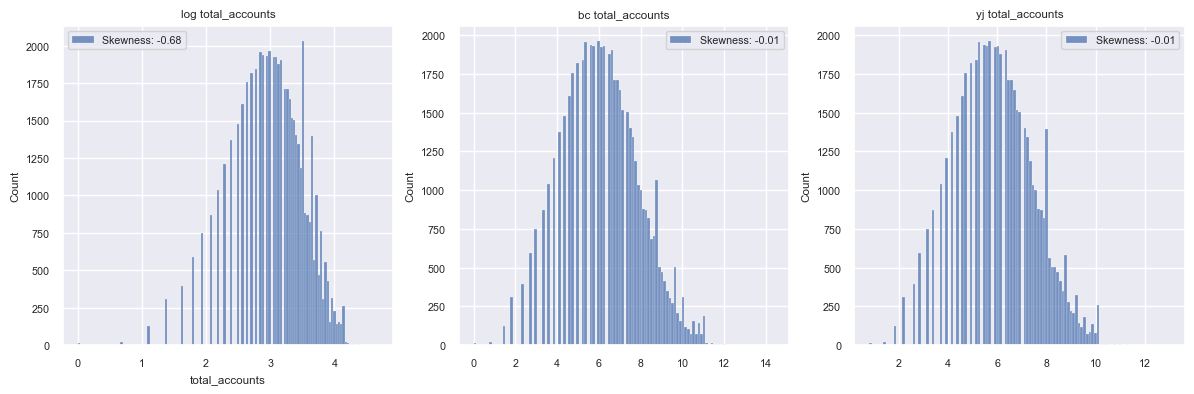

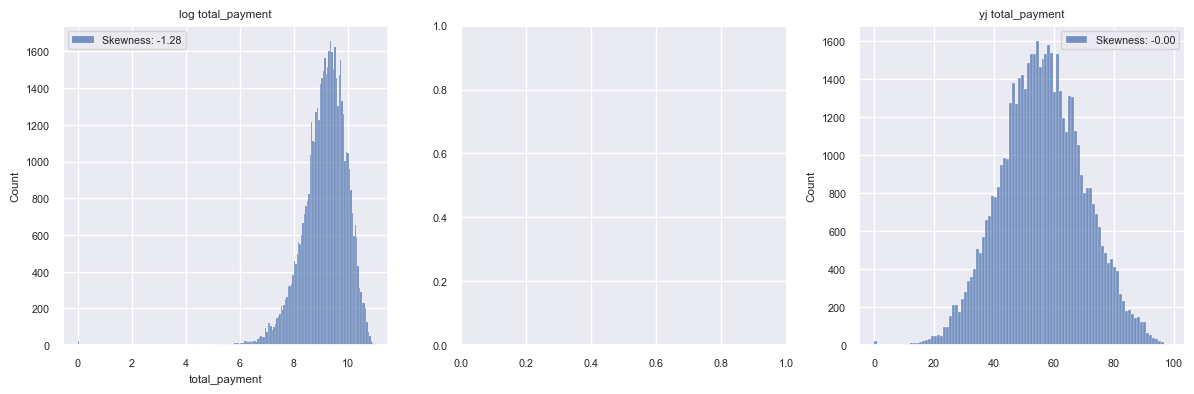

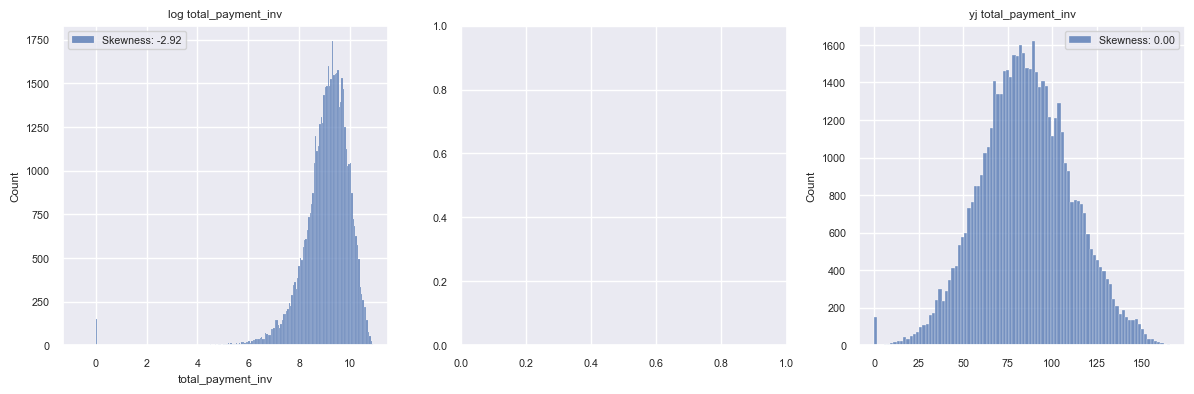

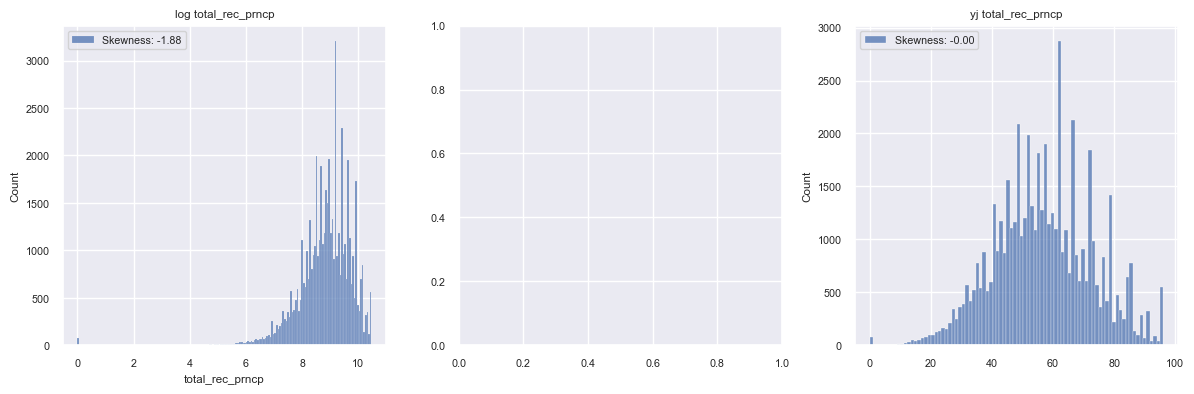

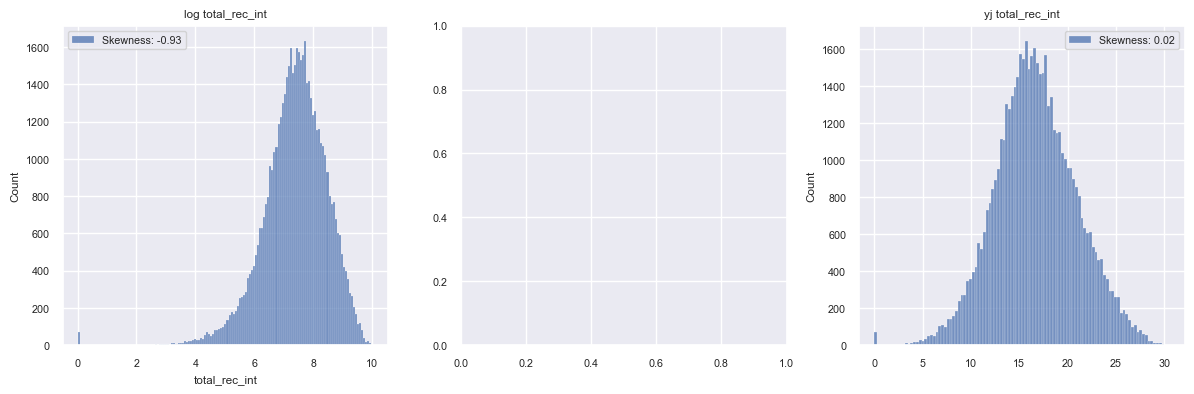

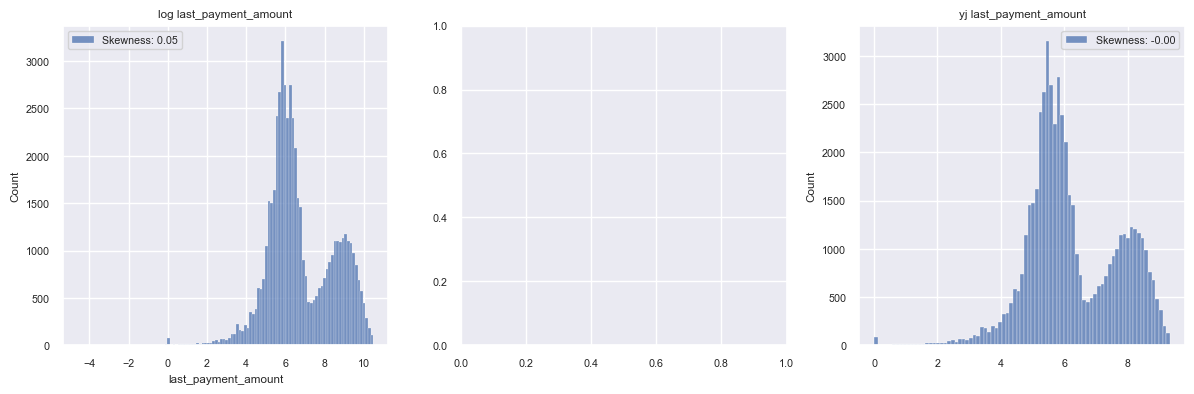

In [12]:
#Transforming skewed columns
skewed_cols = df_dft.identify_skewed_cols(excluded_cols).tolist()
cols_w_zeros = ['funded_amount_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount'] #non box-cox cols
for col in skewed_cols:
    df_plot.visualise_transformed(col, cols_w_zeros)

### Best Transforms
- loan_amount - bc, yj
- funded_amount - bc, yj
- funded_amount_inv - yj
- instalment - bc, yj
- annual_inc - bc, yj
- open_accounts - yj
- total_accounts - bc, yj
- total_payment - yj
- total_payment_inv - yj
- total_rec_prncp - yj
- total_rec_int - yj
- last_payment_amount - yj

In [13]:
norm_df = df.copy()
norm_df_dft = db_utils.DataFrameTransform(norm_df)
skewed_cols = norm_df_dft.identify_skewed_cols(excluded_cols).tolist()
for col in skewed_cols:
    norm_df_dft.transform_skewed_cols(col)
norm_df = norm_df.drop(skewed_cols, axis=1)
norm_df.head()

Index(['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
       'annual_inc', 'open_accounts', 'total_accounts', 'total_payment',
       'total_payment_inv', 'total_rec_prncp', 'total_rec_int',
       'last_payment_amount'],
      dtype='object') 
 loan_amount            0.805259
funded_amount          0.845563
funded_amount_inv      0.813927
int_rate               0.433193
instalment             0.996981
annual_inc             8.711831
dti                    0.189420
open_accounts          1.059282
total_accounts         0.779014
total_payment          1.267891
total_payment_inv      1.256197
total_rec_prncp        1.261015
total_rec_int          2.204322
last_payment_amount    2.499381
dtype: float64


,id,member_id,term,int_rate,grade,sub_grade,employment_length,home_ownership,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,loan_amount_yeojohnson,funded_amount_yeojohnson,funded_amount_inv_yeojohnson,instalment_yeojohnson,annual_inc_yeojohnson,open_accounts_yeojohnson,total_accounts_yeojohnson,total_payment_yeojohnson,total_payment_inv_yeojohnson,total_rec_prncp_yeojohnson,total_rec_int_yeojohnson,last_payment_amount_yeojohnson
0,38676116,41461848,36,7.49,A,A4,5 years,MORTGAGE,Not Verified,2021-01-01,Current,True,credit_card,19.54,2,1987-10-01,1,5529.70,5529.70,0.0,0.0,0.0,2022-01-01,2022-01-01,0,1,INDIVIDUAL,67.908416,78.476068,119.794522,16.115058,7.932075,3.411426,6.705273,36.974332,52.846819,37.830320,12.042267,5.189973
1,38656203,41440010,36,6.99,A,A3,9 years,RENT,Not Verified,2021-01-01,Current,True,credit_card,24.20,0,2001-09-01,0,9102.83,9102.83,0.0,0.0,0.0,2022-01-01,2022-01-01,0,1,INDIVIDUAL,81.878605,95.571124,150.204280,19.556802,7.975957,3.777782,7.191366,43.796078,64.331414,45.358684,13.525566,5.621638
2,38656154,41439961,36,7.49,A,A4,8 years,MORTGAGE,Source Verified,2021-01-01,Fully Paid,True,credit_card,16.92,0,1998-09-01,0,0.00,0.00,0.0,0.0,0.0,2021-10-01,2021-10-01,0,1,INDIVIDUAL,87.951844,103.058197,163.807154,21.122609,8.178785,2.615398,5.425819,66.438466,104.683771,73.278421,13.689240,8.517393
3,38656128,41439934,36,14.31,C,C4,1 year,RENT,Source Verified,2021-01-01,Fully Paid,True,debt_consolidation,35.52,0,2008-06-01,0,0.00,0.00,0.0,0.0,0.0,2021-06-01,2021-06-01,0,1,INDIVIDUAL,85.867257,100.484792,159.113347,21.401242,7.883949,2.410498,4.542865,65.262616,102.514604,71.648981,14.199200,8.580717
4,38656121,41439927,36,6.03,A,A1,10+ years,MORTGAGE,Verified,2021-01-01,Current,True,debt_consolidation,3.33,0,2002-04-01,1,10297.47,10297.47,0.0,0.0,0.0,2022-01-01,2022-01-01,0,1,INDIVIDUAL,85.867257,100.484792,159.113347,20.434100,8.517561,4.541560,9.095153,45.526205,67.299192,47.639950,13.447401,5.720426


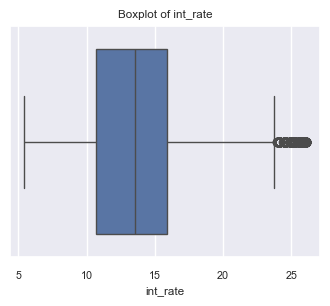

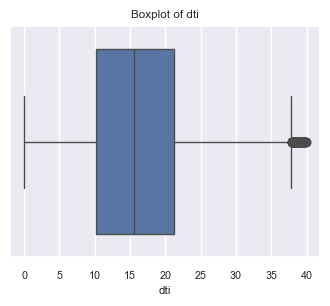

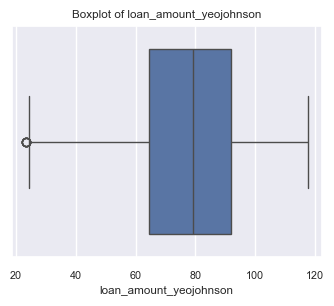

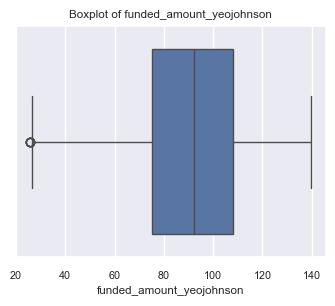

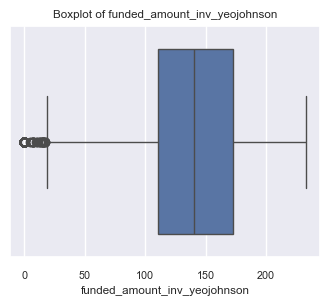

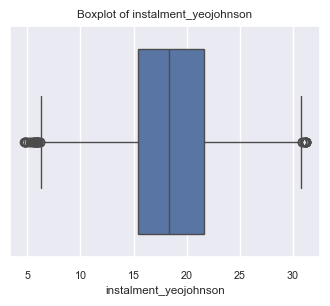

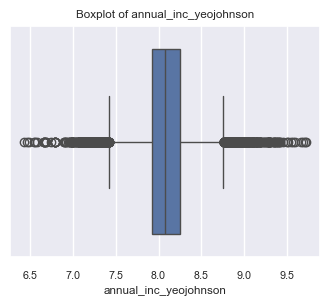

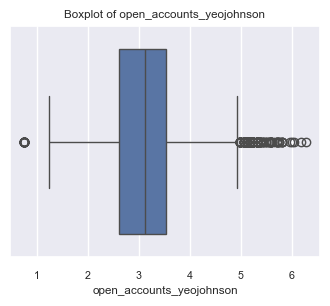

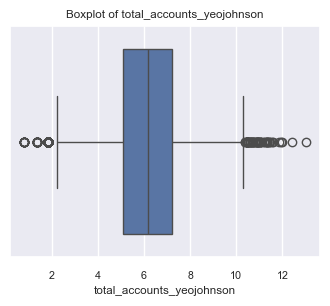

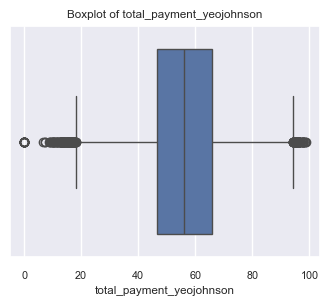

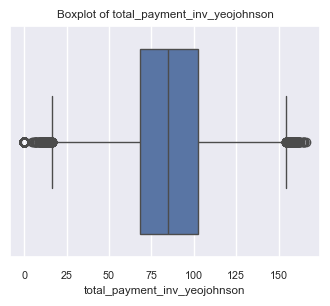

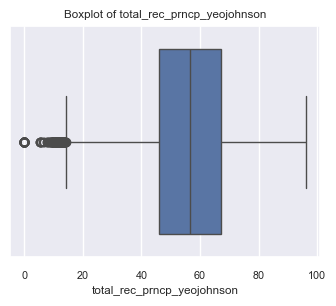

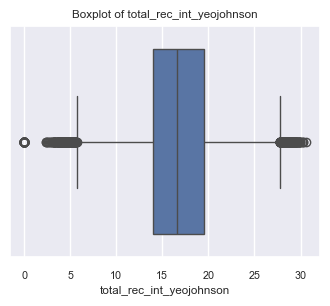

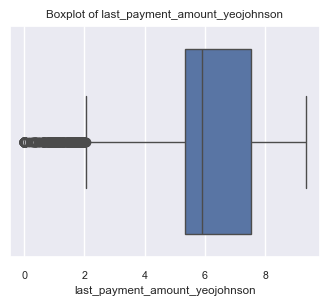

In [14]:
#Visualising outliers
norm_df_plot = db_utils.Plotter(norm_df)
norm_df_plot.visualise_outliers(excluded_cols)

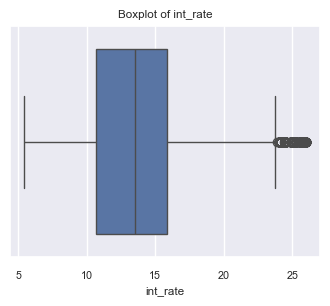

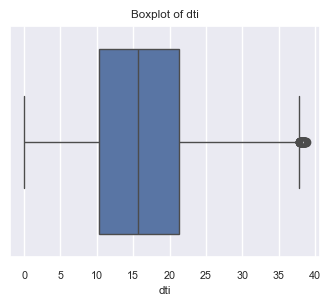

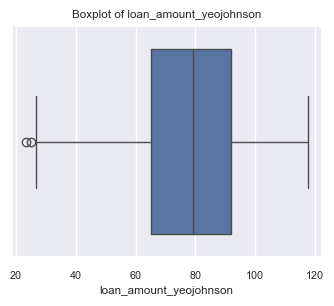

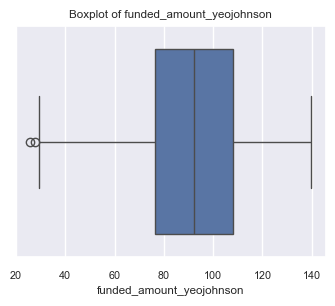

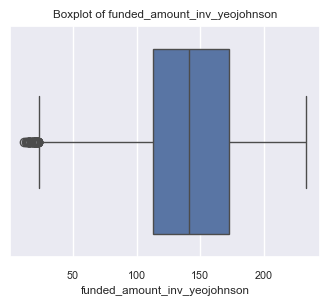

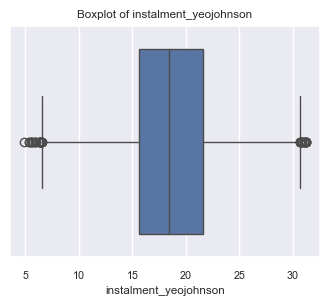

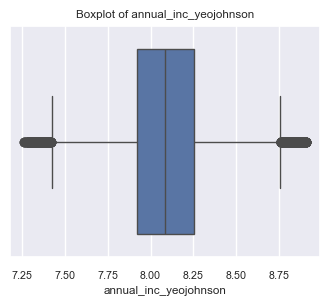

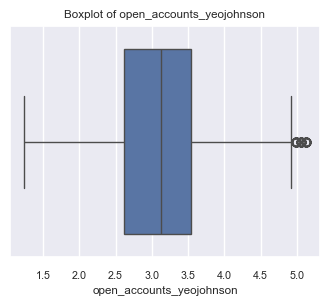

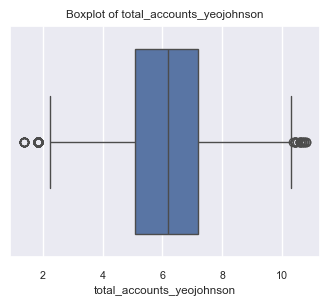

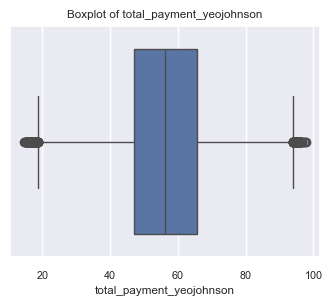

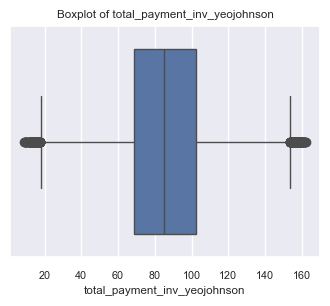

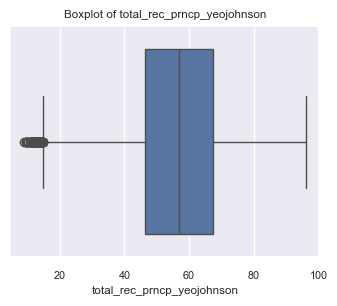

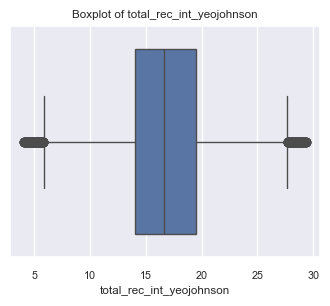

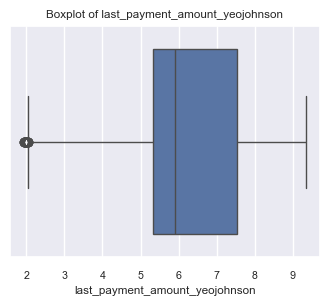

In [15]:
#After removing outliers
norm_df_dft = db_utils.DataFrameTransform(norm_df)
norm_df_dft.remove_outliers(excluded_cols)
norm_df_plot.visualise_outliers(excluded_cols)

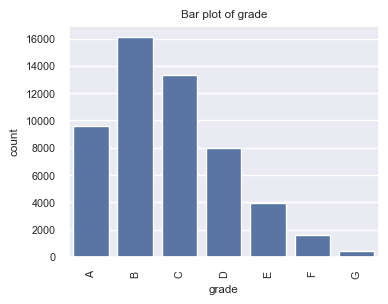

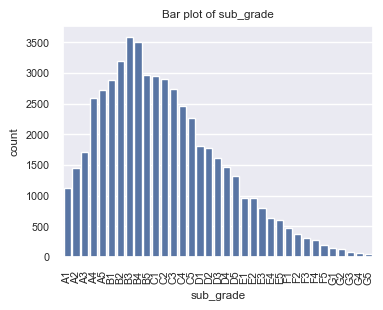

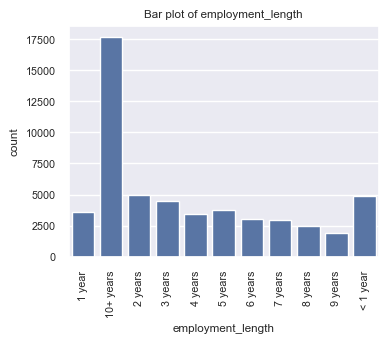

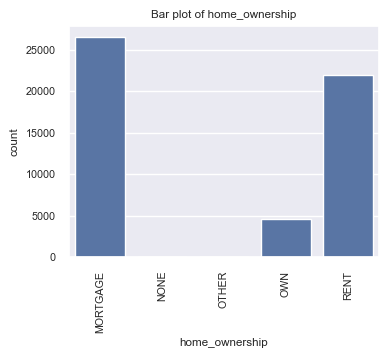

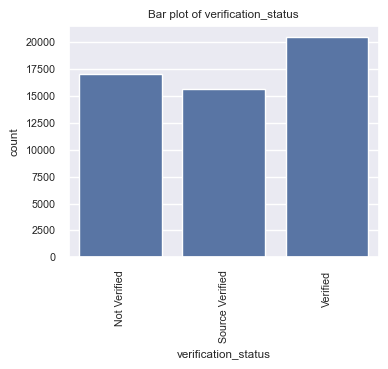

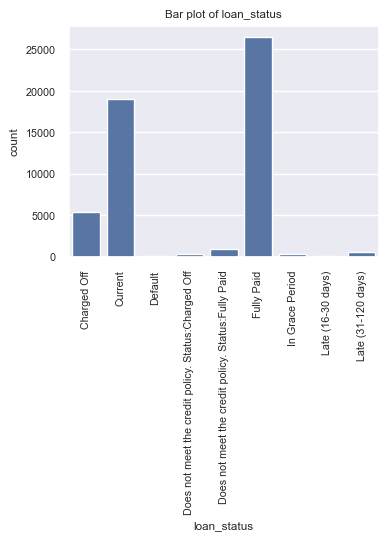

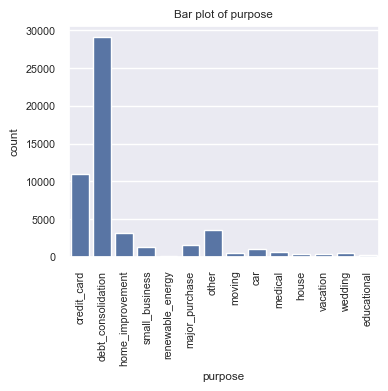

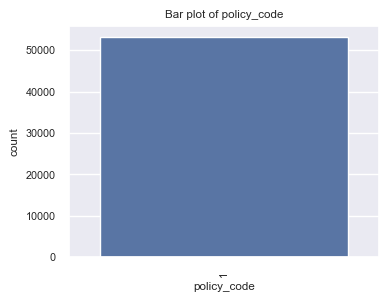

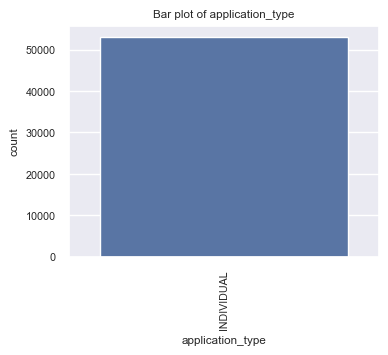

In [16]:
#Check for outliers in categorical columns
norm_df_plot.plot_categorical_cols()

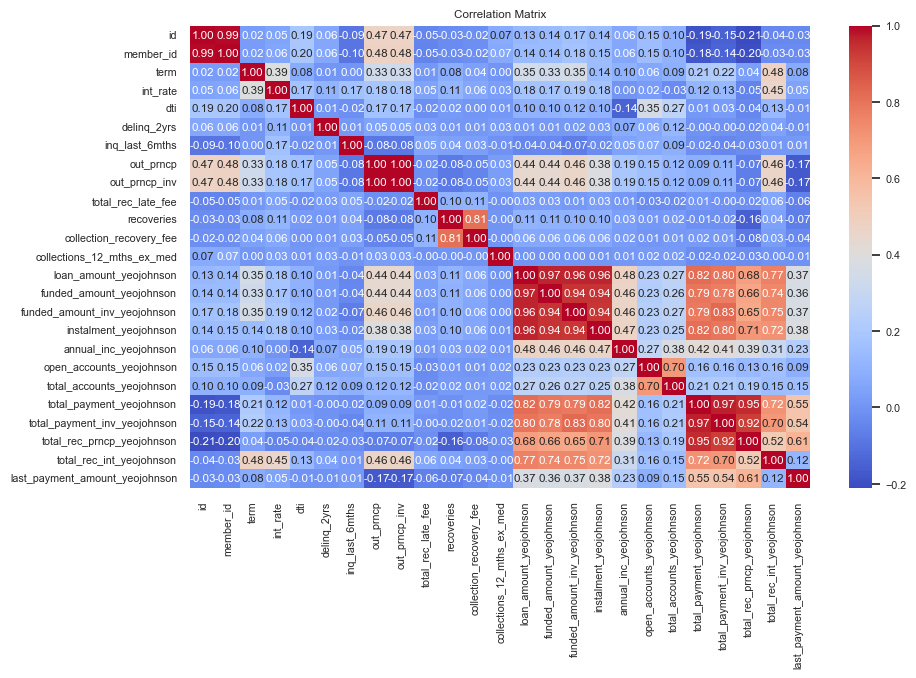

In [17]:
#Visualise correlation matrix
norm_df_plot.visualise_correlation_matrix()

In [18]:
#Remove overly correlated columns
norm_df_dft = db_utils.DataFrameTransform(norm_df)
id_cols = ['id', 'member_id']
norm_df_dft.remove_highly_correlated_cols(id_cols)

Columns to drop: ['out_prncp_inv', 'funded_amount_yeojohnson', 'funded_amount_inv_yeojohnson', 'instalment_yeojohnson', 'total_payment_inv_yeojohnson', 'total_rec_prncp_yeojohnson']
Removed columns: ['out_prncp_inv', 'funded_amount_yeojohnson', 'funded_amount_inv_yeojohnson', 'instalment_yeojohnson', 'total_payment_inv_yeojohnson', 'total_rec_prncp_yeojohnson']


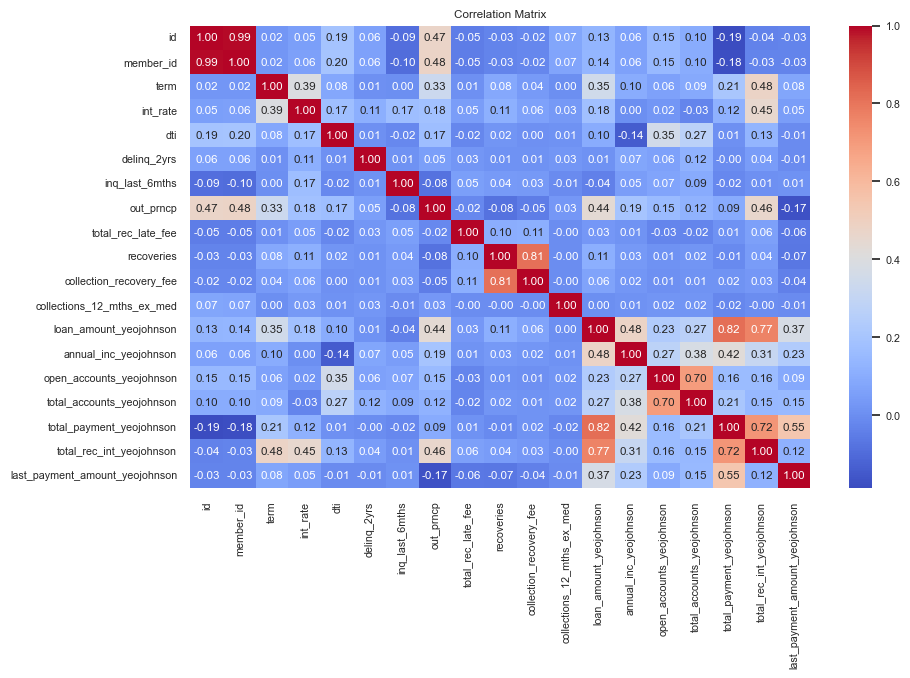

In [19]:
#Visualise correlation matrix after
norm_df_plot.visualise_correlation_matrix()

# Analysis and Visualisation

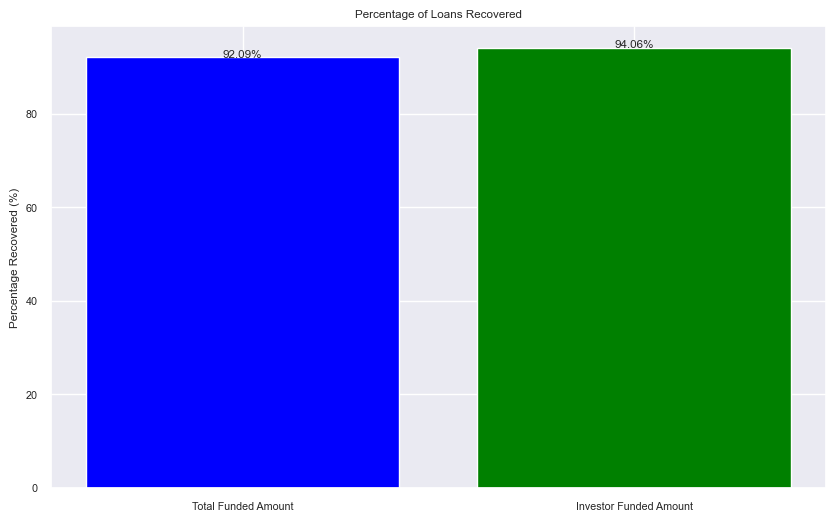

In [20]:
#Check current recoveries
df_analyse = db_utils.LoanAnalysis(df)
df_analyse.calculate_recovery_percentages()
df_analyse.plot_recovery_percentages()

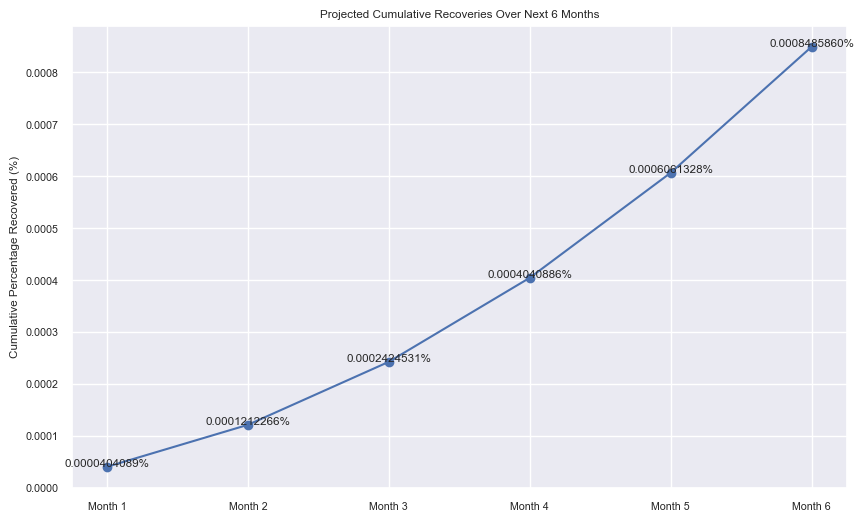

In [21]:
#Estimate future recoveries
df_analyse.estimate_future_recoveries()
df_analyse.plot_future_recoveries()

In [22]:
#Charged off percentage
df_analyse.calculate_charged_off_statistics()

(10.272722243735133, 37400589.040819496)

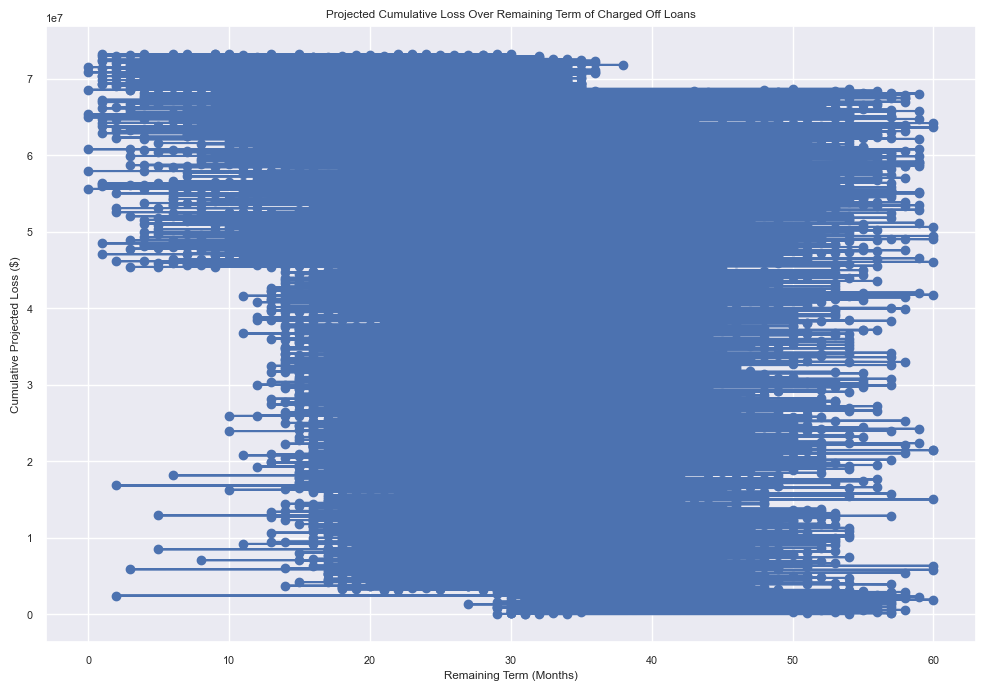

In [23]:
#Projected loss of charged off loans
df_analyse.analyse_charged_off_loans
df_analyse.plot_projected_charged_off_loss()

In [24]:
# At risk loans
df_analyse.analyse_at_risk_loans()

(1.8494956759049255, 7446303.055555555, 3140218.4603143455, 10586521.5158699)

In [25]:
# Combined loss
df_analyse.analyse_combined_loss()

(8.898890901204929, 83819726.05613129)